# Inference: Adaptive Covariance MCMC

This example shows you how to perform Bayesian inference on a time series, using [Adaptive Covariance MCMC](http://pints.readthedocs.io/en/latest/mcmc_samplers/adaptive_covariance_mcmc.html).

It follows on from the [first sampling example](./sampling-first-example.ipynb).

In [1]:
import os
os.chdir('../')
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Choose starting points for 3 mcmc chains
xs = [
    real_parameters * 1.1,
    real_parameters * 0.9,
    real_parameters * 1.15,
]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_posterior, 3, xs, method=pints.DramMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Start adapting after 1000 iterations
mcmc.set_initial_phase_iterations(1000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 2000:, :]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()

Running...
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[-21635.46140101      0.        ]
[-inf   0.]
[-21635.46140101            -inf]
[-inf -inf]
[-15447.90704835      0.        ]
[-26471.49316284            -inf]
[-inf -inf]
[-inf   0.]
[-26471.49316284 -31439.95442076]
[-inf -inf]
[           -inf -24855.97925324]
[-inf -inf]
[           -inf -24855.97925324]
[ -8288.83346671 -31439.95442076]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-55368.27082007            -inf]
[ -7741.33731527 -31439.95442076]
[-inf -inf]
[-55368.27082007 -59030.03808311]
[           -inf -31439.95442076]
[-inf -inf]
[           -inf -59030.03808311]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-37868.33297849            -inf]
[-inf -inf]
[-inf -inf]
[-37868.33297849 -42272.18509326]
[-14388.9960307           -inf]
[-inf -inf]
[-24023.43526288 -42272.18509326]
[-14388.9960307   -9657.38819125]
[-inf -inf]
[-24023.43526288 -19831.79749879]
[-8383.65252662 -9657.38819125]
[-inf -inf]
[           -inf -19831.7974987

pints\_mcmc\_dram.py:219: RuntimeWarning: invalid value encountered in log
  allow_singular=True) -
pints\_mcmc\_dram.py:219: RuntimeWarning: invalid value encountered in double_scalars
  allow_singular=True) -
pints\_mcmc\_dram.py:219: RuntimeWarning: overflow encountered in exp
  allow_singular=True) -


[           -inf -14996.07565961]
[         -inf -9892.4015594]
[-inf -inf]
[           -inf -14996.07565961]
[-40622.20935548            -inf]
[           -inf -12159.01430819]
[          -inf -9275.34685172]
[-40622.20935548 -33197.01890705]
[           -inf -12159.01430819]
[           -inf -33197.01890705]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-27183.08733846            -inf]
[-20516.37511615            -inf]
[-18360.88598063            -inf]
[-27183.08733846            -inf]
[-20516.37511615            -inf]
[-18360.88598063            -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[           -inf -33872.25308337]
[-inf -inf]
[-inf -inf]
[-23047.12923681 -33872.25308337]
[-inf -inf]
[-inf -inf]
[-23047.12923681 -81827.06693332]
[-inf -inf]
[-inf -inf]
[-13656.86840811 -81827.06693332]
[-inf -inf]
[           -inf -10026.02642623]
[-13656.86840811 -13049.85040631]
[-inf -inf]
[           -inf -10026.02642623]
[           -inf -13049.85040631]
[-inf -inf]
[-inf -inf]
[-inf -i

[-inf -inf]
[-17031.80724281 -14076.24558768]
[-inf -inf]
[-inf -inf]
[-17031.80724281            -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[           -inf -13788.25949312]
[-inf -inf]
[-inf -inf]
[           -inf -13788.25949312]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-36552.57159278            -inf]
[-inf -inf]
[-inf -inf]
[-36552.57159278            -inf]
[-inf -inf]
[-18250.05379711            -inf]
[-17012.95079006            -inf]
[-inf -inf]
[-18250.05379711 -19279.42326478]
[-17012.95079006 -21253.45191002]
[-inf -inf]
[-10375.03091008 -19279.42326478]
[-19460.17738513 -21253.45191002]
[-inf -inf]
[-10375.03091008            -inf]
[-19460.17738513            -inf]
[-inf -inf]
[-8636.09189388           -inf]
[-29180.01118815            -inf]
[          -inf -8501.02621382]
[-8636.09189388           -inf]
[-29180.01118815 -22584.9974859 ]
[          -inf -8501.02621382]
[-inf -inf]
[          -inf -22584.9974859]
[-inf -i

[-12027.60084166            -inf]
[          -inf -8555.75418698]
[-inf -inf]
[-12027.60084166 -13690.90483663]
[-6573.64689759 -8555.75418698]
[-inf -inf]
[-19085.8493952  -13690.90483663]
[ -6573.64689759 -11007.87858121]
[          -inf -9676.78793829]
[-19085.8493952           -inf]
[           -inf -11007.87858121]
[          -inf -9676.78793829]
[-9867.57850865           -inf]
[-inf -inf]
[           -inf -10100.31052762]
[-9867.57850865           -inf]
[-inf -inf]
[           -inf -10100.31052762]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-8480.69268453           -inf]
[-inf -inf]
[-inf -inf]
[-8480.69268453           -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-9434.07255286           -inf]
[          -inf -7973.52141198]
[           -inf -11814.52223952]
[-9434.07255286 -7733.31927625]
[          -inf -7973.52141198]
[-21883.06525985 -11814.52223952]
[-17866.35845989  -7733.31927625]
[           -inf -19679.92327275]
[-21883.06525985            -inf]
[-17866.

[-18667.87227961            -inf]
[-23206.11955208            -inf]
[-22599.54244467            -inf]
[-18667.87227961            -inf]
[-inf -inf]
[-22012.88550189            -inf]
[-8315.81052647           -inf]
[-inf -inf]
[-22012.88550189            -inf]
[-8315.81052647           -inf]
[-15759.90584804            -inf]
[-inf -inf]
[-inf -inf]
[-15759.90584804            -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-7258.26653817           -inf]
[-inf -inf]
[-inf -inf]
[ -7258.26653817 -22091.16393428]
[-inf -inf]
[-inf -inf]
[           -inf -22091.16393428]
[           -inf -15089.73448933]
[-inf -inf]
[-inf -inf]
[           -inf -15089.73448933]
[-13000.04232152            -inf]
[-inf -inf]
[-inf -inf]
[-13000.04232152            -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[          -inf -6882.92299765]
[-inf -inf]
[           -inf -14465.97955417]
[-inf -inf]
[           -inf -14465.97955417]
[-5712.85166161 -6882.92299765]
[           -inf -20776.61862932

[          -inf -7093.09183889]
[-inf -inf]
[-18685.65305982            -inf]
[          -inf -7093.09183889]
[-27486.95885689            -inf]
[-inf -inf]
[           -inf -16807.85681313]
[-27486.95885689            -inf]
[           -inf -20085.27815264]
[           -inf -16807.85681313]
[-65303.89558371            -inf]
[-34848.70573668 -20085.27815264]
[          -inf -7618.08027679]
[-65303.89558371 -75611.19810647]
[-34848.70573668            -inf]
[-5840.00603713 -7618.08027679]
[           -inf -75611.19810647]
[-inf -inf]
[-5840.00603713           -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-6065.28720433           -inf]
[-inf -inf]
[-22715.04840417            -inf]
[-6065.28720433 -6398.97909732]
[-inf -inf]
[-22715.04840417            -inf]
[          -inf -6398.97909732]
[-inf -inf]
[-8739.2967361          -inf]
[           -inf -11809.43707581

[-5748.65543715           -inf]
[-9172.63793336           -inf]
[-inf -inf]
[-5748.65543715           -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[           -inf -11929.10150212]
[-inf -inf]
[        -inf -7925.736594]
[           -inf -11929.10150212]
[-21828.21336775            -inf]
[-5692.9883637 -7925.736594 ]
[         -inf -10635.272542]
[-21828.21336775            -inf]
[-5692.9883637  -7881.45232638]
[         -inf -10635.272542]
[-8193.26477089           -inf]
[          -inf -7881.45232638]
[-inf -inf]
[-8193.26477089           -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[          -inf -7017.13450439]
[          -inf -7330.95512506]
[-inf -inf]
[-13357.31528055  -7017.13450439]
[          -inf -7330.95512506]
[-inf -inf]
[-13357.31528055            -inf]
[-inf -inf]
[-inf -inf]
[-5307.19060901           -inf]
[-inf -inf]
[-23562.79812306            -inf]
[ -5307.19060901 -14576.87937814]
[-inf -inf]
[-23562.79812306            -inf]
[           -inf -14576.87937814

[-19564.87975101            -inf]
[-inf -inf]
[-9747.67422346           -inf]
[-19564.87975101  -7107.05584633]
[-inf -inf]
[-21655.94307503            -inf]
[          -inf -7107.05584633]
[-inf -inf]
[-21655.94307503            -inf]
[-inf -inf]
[          -inf -6828.03261501]
[-45810.46072007            -inf]
[-inf -inf]
[          -inf -6828.03261501]
[-45810.46072007 -20580.98018956]
[           -inf -23161.12713048]
[-inf -inf]
[           -inf -20580.98018956]
[           -inf -23161.12713048]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[          -inf -6252.32116679]
[-inf -inf]
[-22797.59609867            -inf]
[          -inf -6252.32116679]
[-inf -inf]
[-22797.59609867            -inf]
[-inf -inf]
[-inf -inf]
[-49309.0497439           -inf]
[-6163.55132278           -inf]
[-inf -inf]
[-49309.0497439           -inf]
[ -6163.55132278 -12531.47056874]
[-inf -inf]
[-inf -inf]
[           -inf -12531.47056874]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-41137.48348157            -inf]
[-inf -i

[-inf -inf]
[           -inf -12139.89096103]
[-inf -inf]
[-19939.33548775            -inf]
[-inf -inf]
[          -inf -6906.01531619]
[-19939.33548775            -inf]
[-4338.38516734           -inf]
[-inf -inf]
[-4338.38516734           -inf]
[-5777.68342374 -6906.01531619]
[-inf -inf]
[-inf -inf]
[          -inf -6906.01531619]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[          -inf -8828.42656175]
[-8356.0686901          -inf]
[-inf -inf]
[-6053.22876383 -8828.42656175]
[-8356.0686901  -4291.61673002]
[-inf -inf]
[ -6053.22876383 -21479.56592495]
[          -inf -4291.61673002]
[-inf -inf]
[-26537.35351259 -21479.56592495]
[-inf -inf]
[-inf -inf]
[-26537.35351259 -24416.08492985]
[-inf -inf]
[-6588.30286639           -inf]
[           -inf -24416.08492985]
[-inf -inf]
[ -6588.30286639 -12483.71036494]
[           -inf -11128.21546628]
[-inf -inf]
[-33647.70597088 -12483.71036494]
[           -inf -11128.21546628]
[-inf -inf]
[-33647.70597088 -36426.54926091]
[           -inf -25695.96

[-inf -inf]
[           -inf -23544.07060915]
[-6256.16240386           -inf]
[-inf -inf]
[-15490.05959121 -23544.07060915]
[-10780.28340744            -inf]
[-inf -inf]
[-15490.05959121 -15384.92613163]
[-10780.28340744            -inf]
[-inf -inf]
[           -inf -15384.92613163]
[-7532.06616133           -inf]
[-inf -inf]
[-inf -inf]
[-7532.06616133           -inf]
[-24291.03711733            -inf]
[-5787.88366664           -inf]
[-inf -inf]
[-24291.03711733            -inf]
[-5787.88366664           -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[          -inf -8067.79592423]
[-inf -inf]
[-30277.4432607           -inf]
[          -inf -8067.79592423]
[-inf -inf]
[-30277.4432607           -inf]
[          -inf -5807.50316411]
[          -inf -5640.81119265]
[-inf -inf]
[-16168.03063515  -5807.50316411]
[          -inf -5640.81119265]
[-inf -inf]
[-16168.03063515            -inf]
[-inf -inf]
[-7621.42675586           -inf]
[-17602.38690973            -inf]
[-7252

[-7554.729096         -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-43002.38181816            -inf]
[-inf -inf]
[-inf -inf]
[-43002.38181816            -inf]
[-9406.65034426           -inf]
[-7130.16704494           -inf]
[-4827.95639704           -inf]
[-9406.65034426           -inf]
[-7130.16704494           -inf]
[-4827.95639704           -inf]
[-34779.989872          -inf]
[-inf -inf]
[-34779.989872          -inf]
[-inf -inf]
[-4506.96288625           -inf]
[-inf -inf]
[-inf -inf]
[-15079.89901972            -inf]
[-inf -inf]
[-inf -inf]
[-15079.89901972            -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-6868.52525114           -inf]
[-inf -inf]
[-inf -inf]
[ -6868.52525114 -37469.24321629]
[-inf -inf]
[-inf -inf]
[-11235.19497724 -37469.24321629]
[-inf -inf]
[-inf -inf]
[-11235.19497724            -inf]
[           -inf -14480.26437497]
[-inf -inf]
[-inf -inf]
[-21234.19226254 -14480.26437497]
[-inf -inf]
[           -inf -15251.11

[-5091.24112736           -inf]
[           -inf -26737.68959984]
[-inf -inf]
[-5091.24112736           -inf]
[-inf -inf]
[-inf -inf]
[-6824.19531948           -inf]
[-inf -inf]
[-inf -inf]
[-6824.19531948           -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[           -inf -10861.09293902]
[-inf -inf]
[-inf -inf]
[           -inf -10861.09293902]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[-inf -inf]
[           -inf -56229.16651654]
[           -inf -16875.85392048]
[-20924.39841245            -inf]
[           -inf -56229.16651654]
[           -inf -16875.85392048]
[-20924.39841245 -21111.10564066]
[           -inf -12386.59232993]
[           -inf -24026.91108886]
[           -inf -21111.10564066]
[-15938.15847316 -12386.59232993]
[-11285.5447898  -24026.91108886]
[-inf -inf]
[-15938.15847316 -42244.02186057]
[-11285.5447898  -22030.94212571]
[-8590.25994545           -inf]
[           -inf -42244.02186057]
[-23521.04

[-3936.74465882 -4137.37932001]
[-4399.38273191 -4952.57230179]
[-3982.56976084 -5022.04133046]
[-3936.74465882 -4039.33609454]
[-4399.38273191 -5141.56336105]
[-4434.79770095 -4039.33609454]
[-4481.21230636 -5141.56336105]
[-3839.43420957 -5022.04133046]
[-4434.79770095 -5055.95726677]
[-4481.21230636 -9576.96709677]
[-3926.83165773 -5022.04133046]
[-4913.105876   -9576.96709677]
[-3926.83165773 -3919.02541061]
[-3873.93630238 -5055.95726677]
[-4913.105876   -7813.72332557]
[-4049.30636219 -3919.02541061]
[-4223.93490912 -5055.95726677]
[-4717.36185614 -7813.72332557]
[-4049.30636219 -6070.90754744]
[-4223.93490912 -9802.92828495]
[-4717.36185614 -4367.43248383]
[-4206.36118199 -6070.90754744]
[-4339.07961238 -9802.92828495]
[-5663.09461618 -4367.43248383]
[-4206.36118199 -4190.28112969]
[-4339.07961238 -4128.00106495]
[-5663.09461618 -4643.69694933]
[-8565.54099589 -4190.28112969]
[-4627.80593172 -4643.69694933]
[-8565.54099589 -4337.77058571]
[-3779.12572451 -4128.00106495]
[-4627.8

[-3761.75872657 -3793.50826366]
[-3944.52086028 -3874.8153071 ]
[-3768.65904829 -3793.50826366]
[-3943.57372519 -3874.8153071 ]
[-3807.80072814 -3849.32516077]
[-3768.65904829 -3767.55380127]
[-3943.57372519 -3811.02251153]
[-3818.4142102  -3849.32516077]
[-3796.51784306 -3767.55380127]
[-3818.4142102  -3823.39479514]
[-3796.51784306 -3783.72382023]
[-3943.57372519 -3894.96282903]
[-3810.01136766 -3823.39479514]
[-3784.82181196 -3783.72382023]
[-3830.3713781  -3894.96282903]
[-3810.01136766 -3876.1295202 ]
[-3784.82181196 -3828.7159686 ]
[-3830.3713781 -3909.8292703]
[-3808.96775512 -3876.1295202 ]
[-3764.08372575 -3828.7159686 ]
[-3856.19521343 -3909.8292703 ]
[-3808.96775512 -3915.69067337]
[-3764.08372575 -3780.12135229]
[-3856.19521343 -3865.8555887 ]
[-3817.59698812 -3915.69067337]
[-3770.53940062 -3780.12135229]
[-3817.59698812 -3820.34828627]
[-3770.53940062 -3765.14896293]
[-3806.60545292 -3865.8555887 ]
[-3838.24654452 -3820.34828627]
[-3840.27299176 -3865.8555887 ]
[-3838.246

[-3808.44989749 -3816.37431499]
[-3805.00622764 -3811.82975167]
[-3760.25608123 -3765.27225537]
[-3808.44989749 -3806.41954545]
[-3762.73264935 -3765.27225537]
[-3805.99144711 -3811.82975167]
[-3762.73264935 -3815.62220941]
[-3808.44989749 -3806.78695776]
[-3806.88657707 -3811.82975167]
[-3760.02138442 -3815.62220941]
[-3806.88657707 -3805.79595782]
[-3760.02138442 -3770.18624683]
[-3806.92046504 -3806.78695776]
[-3763.24560703 -3770.18624683]
[-3806.88657707 -3804.27624722]
[-3763.24560703 -3759.93616806]
[-3807.00168825 -3806.78695776]
[-3808.64456773 -3806.78695776]
[-3806.88657707 -3810.22623875]
[-3757.064674   -3759.93616806]
[-3808.64456773 -3808.58879703]
[-3805.95825893 -3810.22623875]
[-3759.03401943 -3759.93616806]
[-3805.95825893 -3831.97593354]
[-3759.03401943 -3764.96323393]
[-3807.52414925 -3808.58879703]
[-3757.87435517 -3764.96323393]
[-3821.79393227 -3808.58879703]
[-3804.76360656 -3831.97593354]
[-3757.87435517 -3770.55432449]
[-3821.79393227 -3813.21174578]
[-3809.9

[-3809.57710267 -3812.3356012 ]
[-3736.36954303 -3888.53042296]
[-3758.41373708 -3778.87646024]
[-3732.10317881 -3888.53042296]
[-3777.32906513 -3778.87646024]
[-3800.07157593 -3812.3356012 ]
[-3732.10317881 -3731.38238889]
[-3777.32906513 -3749.51065412]
[-3802.68120784 -3812.3356012 ]
[-3733.3162397  -3731.38238889]
[-3802.68120784 -3799.31939094]
[-3733.3162397  -3735.44609653]
[-3777.32906513 -3759.07040702]
[-3803.23933042 -3799.31939094]
[-3766.52972853 -3759.07040702]
[-3803.23933042 -3798.02785387]
[-3727.81750571 -3735.44609653]
[-3766.52972853 -3757.8690987 ]
[-3738.23717867 -3735.44609653]
[-3803.23933042 -3798.37586319]
[-3738.23717867 -3738.52915867]
[-3733.3749542 -3757.8690987]
[-3801.68284574 -3798.37586319]
[-3734.55785203 -3738.52915867]
[-3735.78206337 -3757.8690987 ]
[-3801.68284574 -3799.98944024]
[-3734.55785203 -3734.07771166]
[-3735.78206337 -3740.56358049]
[-3732.09534348 -3734.07771166]
[-3798.02122055 -3799.98944024]
[-3732.09534348 -3768.46332974]
[-3731.091

[-3759.14558966 -3746.86069472]
[-3730.90691383 -3735.06381133]
[-3776.79866745 -3762.23909972]
[-3732.59568951 -3746.86069472]
[-3756.07249758 -3735.06381133]
[-3732.59568951 -3745.38467158]
[-3756.07249758 -3728.69607752]
[-3730.49368456 -3762.23909972]
[-3734.38583172 -3745.38467158]
[-3734.18224892 -3728.69607752]
[-3732.8453623  -3762.23909972]
[-3734.38583172 -3735.35261871]
[-3734.18224892 -3730.88280693]
[-3732.8453623  -3728.34032247]
[-3757.10465857 -3735.35261871]
[-3757.10465857 -3778.23192925]
[-3734.18224892 -3743.17196628]
[-3732.8453623  -3759.00015196]
[-3832.09948574 -3778.23192925]
[-3736.42300054 -3743.17196628]
[-3737.23558339 -3759.00015196]
[-3832.09948574 -3735.52980128]
[-3736.42300054 -3736.85491713]
[-3737.23558339 -3745.27467499]
[-3736.54646539 -3735.52980128]
[-3732.01827711 -3736.85491713]
[-3734.34967723 -3745.27467499]
[-3736.54646539 -3745.08278582]
[-3732.01827711 -3742.89912873]
[-3734.34967723 -3740.6393295 ]
[-3732.02941478 -3745.08278582]
[-3739.8

[-3733.24407718 -3731.06103035]
[-3739.88815315 -3738.32050063]
[-3733.24407718 -3730.27683489]
[-3729.89179604 -3734.72336514]
[-3739.88815315 -3769.37061303]
[-3732.25202463 -3730.27683489]
[-3736.50083801 -3734.72336514]
[-3734.93601639 -3769.37061303]
[-3732.25202463 -3739.85743901]
[-3736.50083801 -3730.91463675]
[-3734.93601639 -3735.53451891]
[-3833.382255   -3739.85743901]
[-3745.73188968 -3735.53451891]
[-3833.382255   -3744.29470512]
[-3730.59982818 -3730.91463675]
[-3745.73188968 -3739.97628156]
[-3731.70327064 -3744.29470512]
[-3741.26209176 -3739.97628156]
[-3731.70327064 -3741.60278919]
[-3729.70989878 -3730.91463675]
[-3741.26209176 -3739.82805823]
[-3799.01391373 -3741.60278919]
[-3737.4254687  -3730.91463675]
[-3738.39374154 -3739.82805823]
[-3799.01391373 -3874.42347683]
[-3737.4254687  -3728.01716854]
[-3738.39374154 -3739.63825862]
[-3771.66200246 -3874.42347683]
[-3756.02668258 -3739.63825862]
[-3771.66200246 -3768.95876683]
[-3737.4254687  -3728.05826306]
[-3756.0

[-3732.82814299 -3738.54272761]
[-3728.70904484 -3734.65833149]
[-3735.79861371 -3731.10506994]
[-3730.65942329 -3738.54272761]
[-3730.65942329 -3730.93880177]
[-3729.28534766 -3734.65833149]
[-3728.47320539 -3731.10506994]
[-3732.62081661 -3730.93880177]
[-3730.6118718  -3731.10506994]
[-3732.62081661 -3733.52778382]
[-3729.13857699 -3734.65833149]
[-3730.6118718  -3728.69263841]
[-3739.76068677 -3733.52778382]
[-3739.76068677 -3733.11384309]
[-3728.46039696 -3734.65833149]
[-3730.6118718  -3735.03191813]
[-3731.73916404 -3735.03191813]
[-3727.81812851 -3733.11384309]
[-3729.52357172 -3734.65833149]
[-3731.73916404 -3729.85200151]
[-3735.17870874 -3733.11384309]
[-3730.33998194 -3734.65833149]
[-3738.56651947 -3729.85200151]
[-3735.17870874 -3737.40931019]
[-3730.33998194 -3734.96962623]
[-3738.56651947 -3733.52540346]
[-3729.52946677 -3737.40931019]
[-3733.4986722  -3733.52540346]
[-3729.52946677 -3729.58794898]
[-3732.33488774 -3734.96962623]
[-3733.4986722  -3730.68327913]
[-3731.2

[-3730.69289632 -3730.98791393]
[-3731.61055296 -3736.48318675]
[-3732.11570016 -3730.83555683]
[-3730.53096822 -3730.98791393]
[-3731.09318955 -3736.48318675]
[-3736.33869244 -3730.83555683]
[-3736.33869244 -3730.93655421]
[-3728.32510731 -3730.98791393]
[-3734.33592923 -3736.48318675]
[-3727.89794399 -3730.93655421]
[-3727.76669901 -3730.98791393]
[-3732.1827148  -3736.48318675]
[-3728.47964195 -3730.93655421]
[-3731.00457479 -3730.98791393]
[-3728.47964195 -3729.07751708]
[-3731.00457479 -3729.42159141]
[-3731.1868767  -3736.48318675]
[-3737.34988328 -3736.48318675]
[-3727.89172979 -3729.07751708]
[-3727.34883895 -3729.42159141]
[-3737.34988328 -3732.63397288]
[-3730.33848736 -3729.07751708]
[-3728.87187841 -3729.42159141]
[-3729.29883613 -3732.63397288]
[-3730.92084467 -3729.07751708]
[-3730.56706597 -3729.42159141]
[-3730.92084467 -3727.83537479]
[-3730.56706597 -3728.96260162]
[-3728.45108286 -3732.63397288]
[-3730.18157714 -3732.63397288]
[-3730.92084467 -3727.98402688]
[-3729.3

[-3729.55603778 -3729.71056281]
[-3727.89719382 -3730.62323109]
[-3733.12583994 -3734.22643468]
[-3733.35194175 -3729.71056281]
[-3729.43039314 -3730.62323109]
[-3733.35194175 -3734.86261215]
[-3729.43039314 -3727.51384156]
[-3731.3692979  -3734.22643468]
[-3728.80147464 -3734.86261215]
[-3729.43039314 -3729.54504528]
[-3731.59152643 -3734.22643468]
[-3733.24666457 -3734.86261215]
[-3727.78214855 -3729.54504528]
[-3744.87219169 -3734.22643468]
[-3733.24666457 -3728.11904803]
[-3727.78214855 -3729.01438846]
[-3744.87219169 -3732.54480635]
[-3733.51488823 -3728.11904803]
[-3729.3142276  -3729.01438846]
[-3733.51488823 -3731.64337965]
[-3729.3142276  -3728.97757389]
[-3731.7148078  -3732.54480635]
[-3727.9657535  -3731.64337965]
[-3727.85329815 -3728.97757389]
[-3727.90148551 -3732.54480635]
[-3729.66419609 -3731.64337965]
[-3729.11057512 -3728.97757389]
[-3729.66419609 -3728.4092912 ]
[-3729.11057512 -3727.66783556]
[-3728.17041647 -3732.54480635]
[-3730.16998919 -3728.4092912 ]
[-3728.1

[-3731.93375746 -3731.87338962]
[-3732.11875665 -3733.61169285]
[-3731.20076619 -3732.23626683]
[-3731.93375746 -3734.32760134]
[-3732.11875665 -3728.32257834]
[-3731.20076619 -3741.07428428]
[-3732.76258348 -3734.32760134]
[-3732.76258348 -3732.71574818]
[-3732.11875665 -3730.32844606]
[-3730.93423014 -3741.07428428]
[-3735.97352344 -3732.71574818]
[-3729.26607452 -3730.32844606]
[-3735.97352344 -3738.20547989]
[-3729.26607452 -3727.5049503 ]
[-3727.52016965 -3741.07428428]
[-3730.35979532 -3741.07428428]
[-3729.15467938 -3738.20547989]
[-3729.26607452 -3727.88127029]
[-3730.35979532 -3730.07930888]
[-3730.3942798  -3738.20547989]
[-3728.97948024 -3730.07930888]
[-3730.3942798  -3728.26926498]
[-3729.26607452 -3730.37844746]
[-3728.97948024 -3729.81846853]
[-3730.41479201 -3730.37844746]
[-3728.02400297 -3729.81846853]
[-3730.3942798  -3729.12811643]
[-3730.41479201 -3729.87241866]
[-3728.02400297 -3727.98345177]
[-3730.15126114 -3727.98345177]
[-3730.3942798  -3732.75762462]
[-3730.4

[-3730.36650302 -3729.47544163]
[-3728.19548446 -3728.59306819]
[-3729.63017181 -3729.36684254]
[-3729.40484995 -3728.59306819]
[-3730.53019014 -3729.47544163]
[-3729.40484995 -3729.61540822]
[-3728.59106437 -3729.36684254]
[-3730.56446269 -3729.61540822]
[-3730.57513568 -3729.36684254]
[-3729.95307595 -3729.47544163]
[-3730.56446269 -3728.97841035]
[-3730.57513568 -3734.65878493]
[-3732.75367845 -3728.97841035]
[-3730.34218013 -3734.65878493]
[-3728.2115381  -3729.47544163]
[-3732.75367845 -3727.63439635]
[-3730.34218013 -3729.2747549 ]
[-3729.85955883 -3729.2747549 ]
[-3728.59263442 -3729.47544163]
[-3732.75367845 -3730.03764231]
[-3729.85955883 -3729.31748821]
[-3730.43478343 -3729.47544163]
[-3729.56481027 -3730.03764231]
[-3730.43478343 -3732.4707884 ]
[-3729.56481027 -3728.33190798]
[-3729.85955883 -3733.16129249]
[-3727.5385087 -3732.4707884]
[-3729.56481027 -3729.78463453]
[-3728.34280215 -3733.16129249]
[-3730.41109127 -3732.4707884 ]
[-3733.68013588 -3733.16129249]
[-3730.411

[-3730.4293906  -3731.10523302]
[-3732.06368337 -3728.20227752]
[-3730.4293906 -3727.8089217]
[-3729.83265222 -3731.85944486]
[-3732.06368337 -3728.08147206]
[-3730.4293906  -3731.02304996]
[-3729.96269622 -3731.85944486]
[-3730.07887855 -3728.08147206]
[-3728.26144658 -3731.02304996]
[-3733.6309087  -3731.85944486]
[-3730.07887855 -3728.0216806 ]
[-3728.26144658 -3727.74071793]
[-3733.6309087  -3730.38667964]
[-3730.8008033 -3728.0216806]
[-3730.8008033  -3730.30318846]
[-3728.26144658 -3730.97763343]
[-3733.6309087  -3738.90582194]
[-3730.95064055 -3730.30318846]
[-3728.57781551 -3730.97763343]
[-3730.95064055 -3732.50118186]
[-3728.57781551 -3729.132821  ]
[-3728.46519325 -3738.90582194]
[-3728.47813383 -3732.50118186]
[-3727.44362963 -3729.132821  ]
[-3728.0958077  -3738.90582194]
[-3728.2425635 -3729.132821 ]
[-3728.50487269 -3732.50118186]
[-3728.2425635 -3727.5489374]
[-3728.05580479 -3738.90582194]
[-3730.19037187 -3732.50118186]
[-3730.949979   -3738.90582194]
[-3730.19037187 

[-3728.28436868 -3728.79906123]
[-3728.93887558 -3730.56068493]
[-3728.79182704 -3728.79906123]
[-3728.17635483 -3733.10913466]
[-3728.79182704 -3728.20859858]
[-3728.68797817 -3730.56068493]
[-3728.97521164 -3733.10913466]
[-3733.56496514 -3730.56068493]
[-3728.97521164 -3730.32937665]
[-3728.79182704 -3728.30391451]
[-3733.56496514 -3735.44228369]
[-3730.07743101 -3730.32937665]
[-3730.07743101 -3730.18287487]
[-3728.79182704 -3733.08040199]
[-3727.63065831 -3735.44228369]
[-3731.472099   -3730.18287487]
[-3731.472099   -3728.17211443]
[-3729.60220414 -3733.08040199]
[-3727.67747775 -3735.44228369]
[-3731.64217337 -3733.08040199]
[-3729.3568443  -3735.44228369]
[-3731.472099   -3728.62416076]
[-3731.64217337 -3731.1958418 ]
[-3729.3568443  -3729.88864932]
[-3731.65107234 -3731.1958418 ]
[-3731.472099   -3728.99078486]
[-3731.65107234 -3729.99260142]
[-3727.5977855  -3729.88864932]
[-3729.15894134 -3729.88864932]
[-3731.472099   -3729.33715572]
[-3727.58437202 -3729.99260142]
[-3729.1

[-3734.45555934 -3729.43162054]
[-3731.77245761 -3733.09354089]
[-3735.12755383 -3732.99969241]
[-3734.45555934 -3735.50842826]
[-3731.85523339 -3733.09354089]
[-3731.27770368 -3732.99969241]
[-3731.85523339 -3730.53967117]
[-3731.27770368 -3728.35322371]
[-3728.83106729 -3735.50842826]
[-3730.4478202  -3735.50842826]
[-3727.98643954 -3730.53967117]
[-3731.27770368 -3727.70630458]
[-3730.4478202  -3727.86894844]
[-3730.17723521 -3730.53967117]
[-3730.33576406 -3727.70630458]
[-3730.17723521 -3730.47858593]
[-3730.33576406 -3727.9987959 ]
[-3730.4478202  -3728.64983781]
[-3730.31941971 -3730.47858593]
[-3730.31941971 -3727.3734532 ]
[-3728.24509928 -3727.9987959 ]
[-3727.62908574 -3728.64983781]
[-3729.21181532 -3728.64983781]
[-3728.09289101 -3727.3734532 ]
[-3727.817427  -3727.9987959]
[-3729.21181532 -3729.13492385]
[-3729.64357505 -3727.3734532 ]
[-3729.64357505 -3729.2131579 ]
[-3728.06218921 -3727.9987959 ]
[-3728.75377509 -3729.13492385]
[-3729.03845804 -3727.9987959 ]
[-3730.851

[-3735.70660928 -3728.49577408]
[-3730.39120188 -3727.75877517]
[-3727.63014591 -3727.95236871]
[-3735.70660928 -3734.88520138]
[-3728.90241754 -3727.75877517]
[-3728.24452767 -3727.95236871]
[-3728.90241754 -3729.27194622]
[-3728.24452767 -3732.05681048]
[-3729.79907969 -3734.88520138]
[-3733.36439974 -3734.88520138]
[-3728.11640635 -3729.27194622]
[-3727.73667531 -3732.05681048]
[-3733.36439974 -3732.67197468]
[-3729.37309069 -3729.27194622]
[-3734.43433488 -3732.67197468]
[-3729.37309069 -3728.90943071]
[-3727.59952146 -3732.05681048]
[-3734.43433488 -3728.35222081]
[-3729.37309069 -3729.5130533 ]
[-3728.11779291 -3732.05681048]
[-3730.17531363 -3728.35222081]
[-3729.69153625 -3729.5130533 ]
[-3730.62153506 -3732.05681048]
[-3734.91430094 -3728.35222081]
[-3729.69153625 -3727.88011219]
[-3730.62153506 -3729.69342742]
[-3734.91430094 -3727.92298148]
[-3730.53915803 -3729.69342742]
[-3729.75296134 -3727.88011219]
[-3730.53915803 -3728.94542453]
[-3734.91430094 -3735.1849655 ]
[-3733.8

[-3727.62735462 -3727.55741234]
[-3728.24843211 -3728.31917797]
[-3728.49032303 -3730.97650979]
[-3729.52799425 -3730.97650979]
[-3727.59043894 -3727.55741234]
[-3727.67732364 -3728.31917797]
[-3729.52799425 -3732.63896697]
[-3728.79894089 -3727.55741234]
[-3731.89978884 -3732.63896697]
[-3728.79894089 -3728.02449343]
[-3729.18791861 -3728.31917797]
[-3731.89978884 -3729.0895852 ]
[-3728.79894089 -3727.62591655]
[-3728.37179545 -3728.31917797]
[-3728.04625963 -3729.0895852 ]
[-3729.48045303 -3728.31917797]
[-3728.45843578 -3727.62591655]
[-3729.48045303 -3728.68533166]
[-3729.40072868 -3729.0895852 ]
[-3728.91635302 -3727.62591655]
[-3733.67764458 -3729.0895852 ]
[-3728.91635302 -3728.16203563]
[-3732.31250622 -3728.68533166]
[-3733.67764458 -3730.02157151]
[-3735.31615918 -3728.68533166]
[-3728.91635302 -3729.06394071]
[-3735.31615918 -3734.08314603]
[-3733.67764458 -3730.81576669]
[-3729.8997993  -3729.06394071]
[-3737.79493146 -3734.08314603]
[-3732.73140572 -3730.81576669]
[-3729.8

[-3728.47249467 -3731.28964024]
[-3730.10297374 -3728.66897858]
[-3728.47249467 -3727.4406066 ]
[-3732.28089075 -3729.36204931]
[-3730.10297374 -3728.6111055 ]
[-3728.65380149 -3728.6111055 ]
[-3728.47249467 -3727.46845364]
[-3730.52965892 -3729.36204931]
[-3728.65380149 -3730.51985501]
[-3730.28556782 -3730.51985501]
[-3728.47249467 -3727.58014573]
[-3729.85237694 -3729.36204931]
[-3730.28556782 -3729.49313137]
[-3728.47249467 -3727.64164962]
[-3728.98323903 -3729.36204931]
[-3728.66306504 -3729.49313137]
[-3730.35357807 -3729.36204931]
[-3731.77035435 -3729.49313137]
[-3728.47249467 -3727.99257823]
[-3730.35357807 -3731.19436223]
[-3731.77035435 -3728.57586085]
[-3732.25060638 -3728.57586085]
[-3727.86856513 -3727.99257823]
[-3727.661595   -3731.19436223]
[-3732.25060638 -3728.29511838]
[-3729.89906694 -3727.99257823]
[-3729.89906694 -3727.98927012]
[-3728.14423296 -3731.19436223]
[-3729.35247202 -3728.29511838]
[-3728.34574701 -3731.19436223]
[-3729.89906694 -3728.08650794]
[-3728.3

[-3730.92982205 -3728.45027266]
[-3733.6644245  -3731.56447807]
[-3728.87848836 -3736.59905802]
[-3730.40949987 -3728.45027266]
[-3730.40949987 -3728.12706286]
[-3733.6644245  -3729.53536269]
[-3729.2559274  -3736.59905802]
[-3732.24435244 -3736.59905802]
[-3730.40949987 -3728.74049637]
[-3733.6644245  -3727.87967732]
[-3732.24435244 -3731.02754156]
[-3730.92829818 -3728.74049637]
[-3730.64151626 -3731.02754156]
[-3730.92829818 -3727.68046099]
[-3733.6644245  -3727.82506735]
[-3730.64151626 -3731.52557379]
[-3727.92980831 -3727.68046099]
[-3733.6644245  -3728.31348527]
[-3728.74811894 -3731.52557379]
[-3730.72937999 -3727.68046099]
[-3732.72745712 -3731.52557379]
[-3730.72937999 -3730.48872456]
[-3733.6644245  -3731.79521846]
[-3732.72745712 -3732.38417971]
[-3728.56828637 -3730.48872456]
[-3728.52642742 -3731.79521846]
[-3731.09965598 -3732.38417971]
[-3728.56828637 -3728.74273648]
[-3728.52642742 -3730.35183121]
[-3731.09965598 -3731.08150489]
[-3730.75222997 -3731.08150489]
[-3727.7

[-3729.34906154 -3733.71276668]
[-3728.84379582 -3733.16982171]
[-3729.82370645 -3728.89452962]
[-3730.6553473  -3733.71276668]
[-3731.27185766 -3733.16982171]
[-3730.29636249 -3728.89452962]
[-3730.6553473  -3729.97767973]
[-3731.27185766 -3731.09818882]
[-3730.29636249 -3730.56982365]
[-3731.13042565 -3729.97767973]
[-3732.63948295 -3731.09818882]
[-3732.18823339 -3730.56982365]
[-3731.13042565 -3728.5027148 ]
[-3732.63948295 -3729.30996417]
[-3732.18823339 -3728.68999094]
[-3731.13042565 -3729.37489279]
[-3732.63948295 -3731.50543059]
[-3732.18823339 -3731.62363286]
[-3730.28165664 -3731.50543059]
[-3731.95946632 -3731.62363286]
[-3728.07324005 -3729.37489279]
[-3730.28165664 -3732.02145788]
[-3731.95946632 -3729.58225427]
[-3728.33711013 -3729.37489279]
[-3728.33711013 -3729.79879855]
[-3727.82946267 -3732.02145788]
[-3728.08821997 -3729.58225427]
[-3732.77800685 -3729.79879855]
[-3729.69961515 -3732.02145788]
[-3732.07736069 -3729.58225427]
[-3732.77800685 -3730.09066261]
[-3729.6

[-3730.77332454 -3729.53021721]
[-3728.06100406 -3733.03666396]
[-3731.50251928 -3732.4920925 ]
[-3730.16990026 -3729.53021721]
[-3733.92620684 -3733.03666396]
[-3730.16990026 -3734.41042437]
[-3733.92620684 -3728.16763196]
[-3728.56930435 -3732.4920925 ]
[-3737.16134582 -3734.41042437]
[-3732.29978525 -3732.4920925 ]
[-3737.16134582 -3731.69132236]
[-3733.92620684 -3728.21757475]
[-3732.29978525 -3729.62881761]
[-3729.82903641 -3731.69132236]
[-3728.94878412 -3728.21757475]
[-3727.87499111 -3729.62881761]
[-3731.65818349 -3731.69132236]
[-3729.52817235 -3728.21757475]
[-3729.85629613 -3729.62881761]
[-3731.65818349 -3728.7097405 ]
[-3729.52817235 -3729.54059952]
[-3729.85629613 -3729.27700575]
[-3734.53578575 -3729.54059952]
[-3731.65818349 -3730.42981804]
[-3734.53578575 -3732.33372015]
[-3727.8642567  -3729.27700575]
[-3734.63993176 -3732.33372015]
[-3731.65385831 -3729.27700575]
[-3729.32354951 -3730.42981804]
[-3734.63993176 -3730.28992811]
[-3731.65385831 -3728.45499189]
[-3731.0

[-3729.91141672 -3731.07907066]
[-3733.11959844 -3727.57419716]
[-3728.1539665  -3729.14410024]
[-3731.93684468 -3731.07907066]
[-3728.34933984 -3729.14410024]
[-3729.03419909 -3727.57419716]
[-3728.34933984 -3730.16080949]
[-3730.93766659 -3731.07907066]
[-3728.37886546 -3730.16080949]
[-3731.81165811 -3731.07907066]
[-3728.84206792 -3727.57419716]
[-3728.37886546 -3729.87797107]
[-3731.81165811 -3730.82166212]
[-3731.58962929 -3727.57419716]
[-3727.89399498 -3729.87797107]
[-3735.29860511 -3730.82166212]
[-3731.58962929 -3729.06450716]
[-3727.89399498 -3727.91604366]
[-3735.29860511 -3736.10487369]
[-3728.60264644 -3727.91604366]
[-3734.51573015 -3736.10487369]
[-3731.58962929 -3728.51652877]
[-3728.60264644 -3728.10826306]
[-3734.51573015 -3729.10367037]
[-3728.24401616 -3728.51652877]
[-3727.66753193 -3728.10826306]
[-3734.51573015 -3740.30431939]
[-3730.13300587 -3728.51652877]
[-3730.13300587 -3729.38370242]
[-3729.43983371 -3728.10826306]
[-3728.74320292 -3740.30431939]
[-3730.6

[-3729.29904689 -3730.16713708]
[-3727.88517165 -3729.69913172]
[-3730.75747611 -3727.51517948]
[-3729.49239727 -3730.16713708]
[-3730.18262346 -3729.69913172]
[-3729.49239727 -3731.7038428 ]
[-3730.18262346 -3727.65020733]
[-3730.75747611 -3728.48739371]
[-3732.11016345 -3731.7038428 ]
[-3732.11016345 -3728.98520829]
[-3730.18262346 -3727.66213612]
[-3730.75747611 -3727.95470836]
[-3728.3036272  -3727.66213612]
[-3728.21358633 -3728.98520829]
[-3728.3036272  -3730.18467242]
[-3730.75747611 -3728.7092728 ]
[-3733.21801708 -3728.98520829]
[-3729.89010968 -3730.18467242]
[-3733.21801708 -3729.34465392]
[-3729.89010968 -3727.80427862]
[-3730.75747611 -3728.31186752]
[-3733.21801708 -3729.04630609]
[-3728.06899563 -3727.80427862]
[-3730.75747611 -3729.31276237]
[-3732.57740867 -3727.80427862]
[-3728.30338858 -3729.04630609]
[-3732.57740867 -3729.03186187]
[-3730.75747611 -3733.76688936]
[-3730.98466252 -3733.76688936]
[-3729.52171247 -3729.04630609]
[-3732.57740867 -3730.48963714]
[-3730.9

[-3731.3143896  -3729.75191316]
[-3728.63051251 -3729.38160623]
[-3727.96544277 -3728.59311647]
[-3728.34818871 -3729.75191316]
[-3728.57564199 -3729.38160623]
[-3727.93009408 -3728.59311647]
[-3727.94132635 -3729.75191316]
[-3730.76855913 -3728.59311647]
[-3730.58960099 -3729.75191316]
[-3728.09034072 -3729.38160623]
[-3730.76855913 -3728.80014743]
[-3730.58960099 -3729.54567109]
[-3728.58495302 -3729.38160623]
[-3729.93351487 -3729.54567109]
[-3728.58495302 -3727.62823808]
[-3730.76855913 -3728.32525023]
[-3729.93351487 -3729.30699219]
[-3732.76302223 -3729.30699219]
[-3728.58495302 -3728.88518723]
[-3728.00180087 -3728.32525023]
[-3732.76302223 -3730.70889168]
[-3730.85489138 -3728.88518723]
[-3729.35876771 -3728.32525023]
[-3729.86565794 -3730.70889168]
[-3730.85489138 -3729.90578441]
[-3729.35876771 -3729.4412052 ]
[-3729.86565794 -3728.02311097]
[-3730.55558169 -3729.90578441]
[-3730.68529237 -3729.4412052 ]
[-3730.26277676 -3728.02311097]
[-3730.55558169 -3730.09110932]
[-3730.6

[-3728.48713318 -3728.61830894]
[-3733.52389861 -3729.32764242]
[-3733.09929325 -3736.30936932]
[-3728.48713318 -3727.4124215 ]
[-3733.52389861 -3735.00602361]
[-3729.57342374 -3736.30936932]
[-3728.48713318 -3728.43018908]
[-3730.69181426 -3736.30936932]
[-3730.43129124 -3735.00602361]
[-3730.69181426 -3732.40691787]
[-3727.78508413 -3728.43018908]
[-3733.11056557 -3735.00602361]
[-3729.92170925 -3728.43018908]
[-3733.11056557 -3732.46333252]
[-3730.3473176  -3732.40691787]
[-3729.92170925 -3728.71929065]
[-3732.32395997 -3732.46333252]
[-3733.07644409 -3732.40691787]
[-3728.65937015 -3728.71929065]
[-3732.32395997 -3732.46875364]
[-3733.07644409 -3730.03099754]
[-3728.65937015 -3729.72583384]
[-3730.29601601 -3729.72583384]
[-3728.8287456  -3732.46875364]
[-3733.07644409 -3730.29866074]
[-3730.29601601 -3731.08625284]
[-3729.74794995 -3732.46875364]
[-3736.00570265 -3730.29866074]
[-3731.28895726 -3731.08625284]
[-3729.74794995 -3730.6377587 ]
[-3736.00570265 -3732.91414151]
[-3731.2

[-3734.80151422 -3734.46871702]
[-3731.37668818 -3738.09442084]
[-3735.5346173  -3728.38082915]
[-3734.80151422 -3727.77341805]
[-3731.22913871 -3728.38082915]
[-3730.59810973 -3738.09442084]
[-3731.22913871 -3729.73118087]
[-3734.80151422 -3727.42432641]
[-3730.14349102 -3729.73118087]
[-3729.57848238 -3727.42432641]
[-3729.18481011 -3738.09442084]
[-3730.14349102 -3727.50700524]
[-3729.57848238 -3730.66647803]
[-3731.68010342 -3730.66647803]
[-3729.35002339 -3738.09442084]
[-3728.34195504 -3727.50700524]
[-3731.68010342 -3728.07434739]
[-3730.19777322 -3727.50700524]
[-3729.89179907 -3738.09442084]
[-3730.19777322 -3729.79910147]
[-3731.68010342 -3727.79831106]
[-3733.73312691 -3738.09442084]
[-3733.73312691 -3729.90801882]
[-3729.19117698 -3729.79910147]
[-3731.68010342 -3728.70555257]
[-3735.24863447 -3729.79910147]
[-3733.73312691 -3729.9466876 ]
[-3735.24863447 -3729.72873479]
[-3731.68010342 -3733.49685707]
[-3731.25385709 -3729.72873479]
[-3729.14833596 -3733.49685707]
[-3733.7

[-3730.32022734 -3733.82655618]
[-3729.85568784 -3727.64619641]
[-3730.32022734 -3728.03560324]
[-3728.40490096 -3729.85879471]
[-3729.85568784 -3728.98883681]
[-3730.32022734 -3728.87346196]
[-3728.74782003 -3729.85879471]
[-3729.85568784 -3728.96145025]
[-3730.69211225 -3729.85879471]
[-3730.32022734 -3728.61755021]
[-3730.69211225 -3727.62930196]
[-3729.85517039 -3728.96145025]
[-3731.67958753 -3728.96145025]
[-3730.32022734 -3730.1352415 ]
[-3729.62695027 -3727.62930196]
[-3731.67958753 -3734.04686191]
[-3730.10743177 -3730.1352415 ]
[-3731.38333421 -3734.04686191]
[-3730.10743177 -3731.76631346]
[-3728.39027542 -3727.62930196]
[-3731.38333421 -3729.54638375]
[-3732.77412971 -3731.76631346]
[-3730.83073621 -3727.62930196]
[-3732.77412971 -3738.73989513]
[-3730.83073621 -3729.79372023]
[-3731.38333421 -3729.71370373]
[-3729.29751089 -3738.73989513]
[-3731.65186434 -3729.71370373]
[-3729.29751089 -3729.07966241]
[-3729.04583066 -3729.79372023]
[-3731.65186434 -3728.22795118]
[-3730.8

[-3728.93431243 -3728.3521306 ]
[-3731.45644905 -3729.25717403]
[-3733.54958508 -3731.88683944]
[-3732.16396924 -3728.3521306 ]
[-3731.45644905 -3727.66521086]
[-3733.54958508 -3728.42489684]
[-3732.16396924 -3729.72201417]
[-3730.42818528 -3729.72201417]
[-3731.45644905 -3727.81909504]
[-3733.54958508 -3734.61424409]
[-3730.42818528 -3731.97242541]
[-3728.58842408 -3727.81909504]
[-3729.61227431 -3734.61424409]
[-3728.58842408 -3727.79247616]
[-3729.61227431 -3728.15798798]
[-3727.6549122  -3731.97242541]
[-3730.02610124 -3731.97242541]
[-3728.58842408 -3730.36536712]
[-3729.61227431 -3728.06729749]
[-3730.02610124 -3729.39984749]
[-3729.02767558 -3729.39984749]
[-3729.36768181 -3730.36536712]
[-3729.61227431 -3728.77566955]
[-3729.02767558 -3730.25257675]
[-3735.06477967 -3728.77566955]
[-3729.42408074 -3730.25257675]
[-3729.34917418 -3730.36536712]
[-3735.06477967 -3727.8270325 ]
[-3729.42408074 -3728.74966555]
[-3728.06211653 -3728.74966555]
[-3728.82737532 -3730.36536712]
[-3727.6

[-3731.29629794 -3728.82551654]
[-3731.57220325 -3734.1721414 ]
[-3731.57220325 -3732.48628451]
[-3728.09593124 -3727.86775838]
[-3731.29629794 -3732.96496178]
[-3730.5298807  -3732.96496178]
[-3729.62399695 -3732.48628451]
[-3727.88569722 -3727.86775838]
[-3730.5298807  -3730.22673829]
[-3733.04568861 -3732.48628451]
[-3730.66300231 -3727.86775838]
[-3733.04568861 -3733.92911991]
[-3730.66300231 -3728.31997326]
[-3729.55980975 -3730.22673829]
[-3728.56566958 -3728.31997326]
[-3736.82543908 -3730.22673829]
[-3730.58760795 -3733.92911991]
[-3728.56566958 -3727.54343474]
[-3736.82543908 -3729.83471857]
[-3731.62605328 -3727.54343474]
[-3731.81275251 -3729.83471857]
[-3730.37143135 -3733.92911991]
[-3731.62605328 -3727.85145816]
[-3731.81275251 -3727.78107149]
[-3738.31146406 -3727.78107149]
[-3731.45832114 -3733.92911991]
[-3728.78011625 -3727.85145816]
[-3738.31146406 -3728.65739278]
[-3731.32685584 -3728.65739278]
[-3728.55130748 -3733.92911991]
[-3728.66324178 -3727.85145816]
[-3731.3

[-3732.48030327 -3729.92795949]
[-3734.07065255 -3729.72990679]
[-3734.07065255 -3734.75136343]
[-3731.24900236 -3733.77337455]
[-3727.86870162 -3729.92795949]
[-3732.07216977 -3734.75136343]
[-3733.61285928 -3733.77337455]
[-3730.51032468 -3729.92795949]
[-3732.07216977 -3729.42233034]
[-3733.61285928 -3730.46328381]
[-3730.51032468 -3727.39053068]
[-3734.15248423 -3729.42233034]
[-3741.7867434  -3730.46328381]
[-3734.15248423 -3729.98288744]
[-3741.7867434  -3731.36188398]
[-3730.51032468 -3729.25629692]
[-3728.47472235 -3729.25629692]
[-3734.15248423 -3739.6852344 ]
[-3741.7867434  -3730.63732877]
[-3728.47472235 -3730.054796  ]
[-3736.65675764 -3739.6852344 ]
[-3733.99437498 -3730.63732877]
[-3736.65675764 -3728.97540379]
[-3733.99437498 -3733.58623984]
[-3728.66795488 -3730.054796  ]
[-3732.71647637 -3730.054796  ]
[-3736.65675764 -3729.4637295 ]
[-3730.74670224 -3733.58623984]
[-3732.71647637 -3729.20232955]
[-3736.4435216  -3733.58623984]
[-3735.74530797 -3729.20232955]
[-3729.1

[-3728.76021969 -3733.18318738]
[-3733.51369904 -3730.5170361 ]
[-3732.00200508 -3727.53889043]
[-3733.03624417 -3733.18318738]
[-3733.20217741 -3730.5170361 ]
[-3732.58658546 -3727.53889043]
[-3733.03624417 -3731.46660573]
[-3733.20217741 -3728.04992521]
[-3732.58658546 -3735.41023204]
[-3729.74007673 -3731.46660573]
[-3730.03367836 -3735.41023204]
[-3729.74007673 -3729.66854922]
[-3728.49541147 -3728.04992521]
[-3730.03367836 -3727.78572817]
[-3730.34916975 -3729.66854922]
[-3733.78415659 -3728.04992521]
[-3730.34916975 -3727.86260484]
[-3733.78415659 -3730.43504695]
[-3730.03367836 -3728.18132176]
[-3734.3423483  -3727.86260484]
[-3734.3423483  -3729.18997044]
[-3728.61016404 -3730.43504695]
[-3730.03367836 -3729.24803878]
[-3731.23715826 -3730.43504695]
[-3734.3423483  -3728.95282847]
[-3731.23715826 -3729.81383935]
[-3728.80073267 -3729.24803878]
[-3732.43425992 -3728.95282847]
[-3729.47859521 -3729.81383935]
[-3732.43425992 -3729.99938963]
[-3729.47859521 -3730.53171433]
[-3729.3

KeyboardInterrupt: 

Running...
Done!


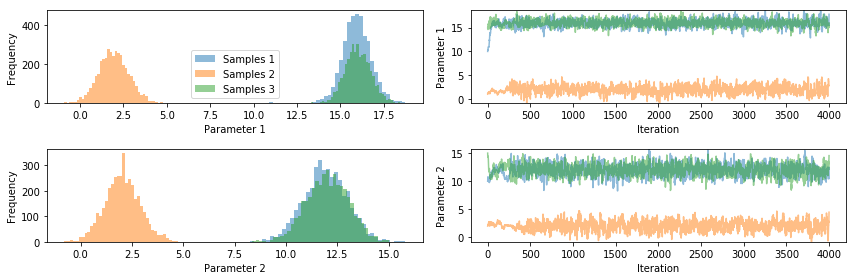

R-hat:
[9.575140971241618, 5.8006586927583621]


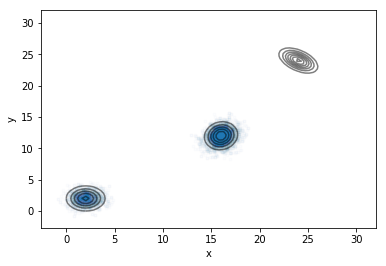

In [2]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a multi-modal logpdf
log_pdf = pints.toy.MultimodalNormalLogPDF(
    [
        [2, 2],
        [16, 12],
        [24, 24],
    ],
    [
        [[1.2, 0.0], [0.0, 1.2]],
        [[0.8, 0.1], [0.1, 1.4]],
        [[1.0, -0.5], [-0.5, 1.0]],
    ]        
)

# Choose starting points for 3 mcmc chains
xs = [[10, 10], [1,2], [15,15]]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_pdf, 3, xs, method=pints.DramMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)
plt.show()

# Discard warm up
chains = chains[:, 2000:, :]

# Print Rhat
print('R-hat:')
print(pints.rhat_all_params(chains))

samples = np.vstack(chains)
x = np.linspace(0, 32, 80)
y = np.linspace(0, 32, 80)
X, Y = np.meshgrid(x, y)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(samples[:,0], samples[:,1], marker='.', alpha=0.01)
plt.xlabel('x')
plt.ylabel('y')
plt.show()